In [107]:
import numpy as np

In [108]:
ml_residuals = np.loadtxt("../experiments/2d/ml/residuals_with_pressure_solver.dat")

In [109]:
mgpcg_residuals = np.loadtxt("../experiments/2d/mgpcg/residuals_with_pressure_solver.dat")

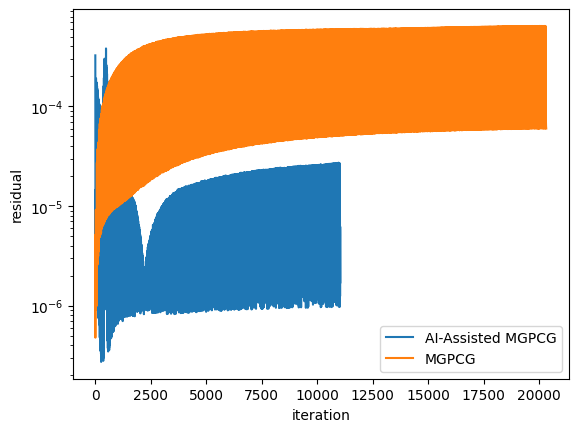

In [110]:
# plot the residuals
import matplotlib.pyplot as plt
plt.plot(ml_residuals, label="AI-Assisted MGPCG")
plt.plot(mgpcg_residuals, label="MGPCG")
plt.yscale('log')
plt.xlabel("iteration")
plt.ylabel("residual")
plt.legend()
plt.show()

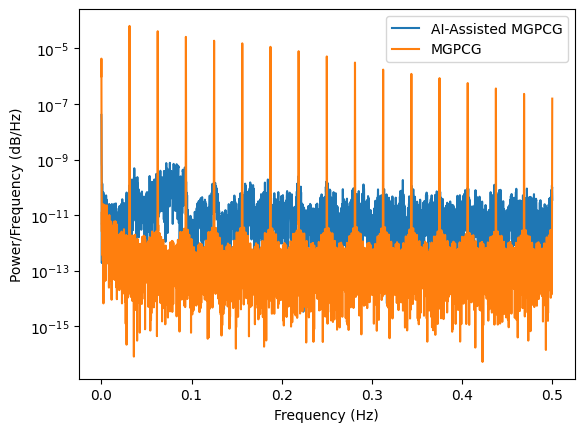

In [111]:
import matplotlib.pyplot as plt
from scipy.signal import welch

# Compute PSD using Welch method
ml_freq, ml_psd = welch(ml_residuals, fs=1.0, nperseg=len(ml_residuals))
mgpcg_freq, mgpcg_psd = welch(mgpcg_residuals, fs=1.0, nperseg=len(mgpcg_residuals))

# Plot the PSD
plt.semilogy(ml_freq, ml_psd, label="AI-Assisted MGPCG")
plt.semilogy(mgpcg_freq, mgpcg_psd, label="MGPCG")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.legend()
plt.show()


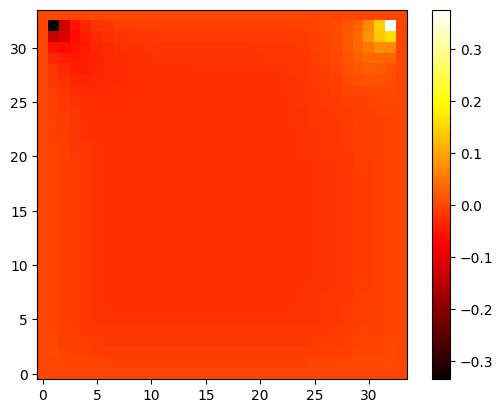

Loss:  1178.3208471443802


In [112]:
import torch
import sys
from train_lid_driven_cavity import custom_loss

residual_data = np.loadtxt("../experiments/2d/mgpcg/ML_data/res_0.dat")
true_error = np.loadtxt("../experiments/2d/mgpcg/ML_data/e_0.dat")
residual_data = torch.tensor(residual_data).to('cuda')

# load the torchscript model
model = torch.jit.load("model.pt")
model.eval()
with torch.no_grad():
    e_data = model(residual_data.float().unsqueeze(0).unsqueeze(0))
    blabla = e_data
    # plot e_data as heatmap
    e_data = e_data.to('cpu')
    e_data = e_data.squeeze(0).squeeze(0)
    plt.imshow(e_data, cmap='hot', interpolation='nearest')
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.show()
    grid_size_x = e_data.shape[0]
    grid_size_y = e_data.shape[1]
    pred_error = e_data.unsqueeze(0).unsqueeze(0).to('cpu')
    true_error = torch.tensor(true_error).unsqueeze(0).unsqueeze(0).to('cpu')
    residual = residual_data.unsqueeze(0).unsqueeze(0).to('cpu')
    loss = custom_loss(pred_error, true_error, residual, grid_size_x, grid_size_y)
    print("Loss: ", loss.item())

In [113]:
# MSE between true and predicted error
mse = torch.mean((pred_error - true_error)**2)
print("MSE: ", mse.item())
# print norms
print("True error norm: ", torch.norm(true_error).item())
print("Predicted error norm: ", torch.norm(pred_error).item())

MSE:  0.00046580171636780466
True error norm:  0.3333625929416875
Predicted error norm:  0.9330345988273621


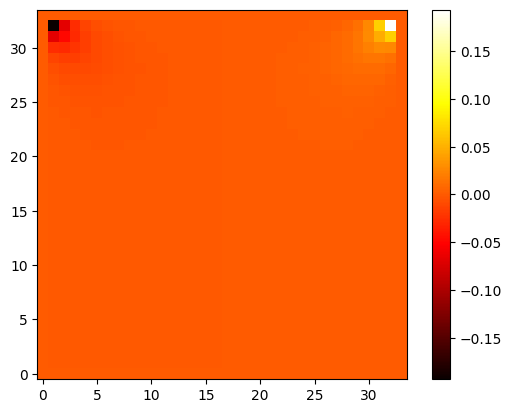

In [114]:
e_data = np.loadtxt("../experiments/2d/mgpcg/ML_data/e_0.dat")
# plot e_data as heatmap
plt.imshow(e_data, cmap='hot', interpolation='nearest')
# invert the y-axis
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

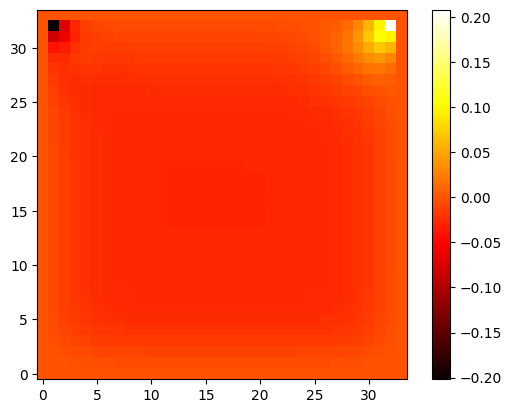

In [115]:
e_data = np.loadtxt("test.dat")
# plot e_data as heatmap
plt.imshow(e_data, cmap='hot', interpolation='nearest')
# invert the y-axis
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

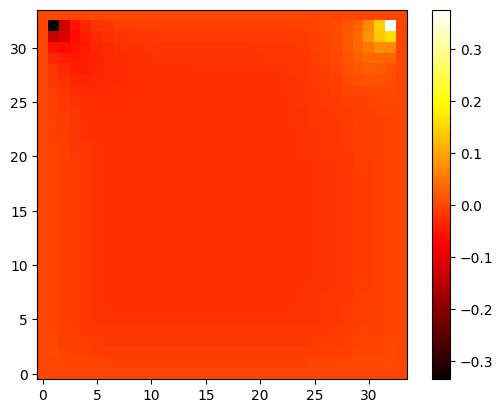

In [116]:
import torch

residual_data = np.loadtxt("test_res.dat")
residual_data = torch.tensor(residual_data).to('cuda')

# load the torchscript model
model = torch.jit.load("model.pt")
model.eval()
with torch.no_grad():
    e_data = model(residual_data.float().unsqueeze(0).unsqueeze(0))
    # plot e_data as heatmap
    e_data = e_data.to('cpu')
    e_data = e_data.squeeze(0).squeeze(0)
    plt.imshow(e_data, cmap='hot', interpolation='nearest')
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.show()

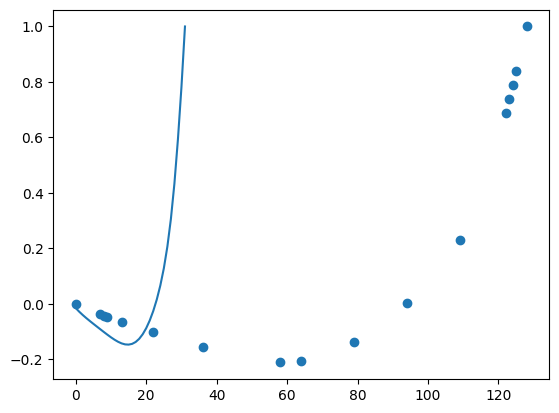

In [117]:
# Ghia et al. (1982) - Re = 100
reference_ux_RE_100 = {
    128: 1.00000,
    125: 0.84123,
    124: 0.78871,
    123: 0.73722,
    122: 0.68717,
    109: 0.23151,
    94: 0.00332,
    79: -0.13641,
    64: -0.20581,
    58: -0.21090,
    36: -0.15662,
    22: -0.10150,
    13: -0.06434,
    9: -0.04775,
    8: -0.04192,
    7: -0.03717,
    0: 0.00000
}

# Ghia et al. (1982) - Re = 100
reference_uy_RE_100 = {
    128: 0.00000,
    124: -0.05906,
    123: -0.07391,
    122: -0.08864,
    121: -0.10313,
    116: -0.16914,
    110: -0.22445,
    103: -0.24533,
    64: 0.05454,
    30: 0.17527,
    29: 0.17507,
    20: 0.16077,
    12: 0.12317,
    10: 0.10890,
    9: 0.10091,
    8: 0.09233,
    0: 0.00000
}

u = np.loadtxt("../experiments/2d/ml/u.dat")
v = np.loadtxt("../experiments/2d/ml/v.dat")

u = u[1:-1, 1:-1]
v = v[1:-1, 1:-1]

# plot u
u = u[:, int(u.shape[1]/2)]
v = v[int(v.shape[0]/2), :]

plt.plot(u, label="AI-Assisted MGPCG")
# plot ghia et al. reference
plt.scatter(reference_ux_RE_100.keys(), reference_ux_RE_100.values(), label="Ghia et al. (1982)")